In [203]:
# just testing gbdx
import shapely
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
import geopandas
import pandas as pd

import matplotlib.pyplot as plt

from IPython.display import display, Markdown, Latex

In [55]:
import sys
#!{sys.executable} -m pip install geoplot
#!{sys.executable} -m pip install descartes

In [14]:
%matplotlib inline

In [31]:
geopandas.datasets.get_path('naturalearth_lowres')

'/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [264]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [50]:
print(world[world.name=='Australia'].geometry)

8    (POLYGON ((145.3979781434948 -40.7925485166058...
Name: geometry, dtype: object


In [249]:
xrows_list = []
for i in range(len(xdf)):
    wkt_string=wkt.dumps(xdf.iloc[i]['Coordinates'])
    types = [ "DigitalGlobeAcquisition" ]
    cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2018-01-01T00:00:00.000Z",
                          endDate="2018-02-01T00:00:00.000Z",
                          types=types)

    dict1 = {'Coordinates': xdf.iloc[i]['Coordinates'], 'Count': len(cresults)}
    xrows_list.append(dict1)

qrdf2w = pd.DataFrame(xrows_list)

In [ ]:
multix = world[world.name=='Australia'].geometry
p = Point(-20,151)
t = multi.contains(p)

rows_list = []
y = -40.0
x = 108.0
for v in range(120):
    x = 108.0
    y += 0.25
    for r in range(200):
        x += 0.25
        p = Point(x,y)
        t = multix.contains(p)
        if(t.any()):
            dict1 = {'Coordinates': Point(x,y).buffer(0.1)}
            # get input row in dictionary format
            # key = col_name
            rows_list.append(dict1)

fdf = pd.DataFrame(rows_list) 

fgdf = geopandas.GeoDataFrame(fdf, geometry='Coordinates')
ax = world2[world.name == 'Australia'].plot(
    color='black', edgecolor='white',figsize=(20,20))

# We can now plot our GeoDataFrame.
#fgdf.plot(ax=ax, color='red')

In [266]:
xrows_list = []
for i in range(len(fdf)):
    wkt_string=wkt.dumps(fdf.iloc[i]['Coordinates'])
    types = [ "DigitalGlobeAcquisition" ]
    cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2018-05-01T00:00:00.000Z",
                          endDate="2018-06-01T00:00:00.000Z",
                          types=types)

    dict1 = {'Coordinates': fdf.iloc[i]['Coordinates'], 'Count': len(cresults)}
    xrows_list.append(dict1)

frdf = pd.DataFrame(xrows_list)

frdf.to_csv('May2018.csv')
frdf.loc[frdf['Count'].idxmax()]

Coordinates    POLYGON ((142.85 -12, 142.8495184726672 -12.00...
Count                                                         34
Name: 10996, dtype: object

In [ ]:
In the following plot:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


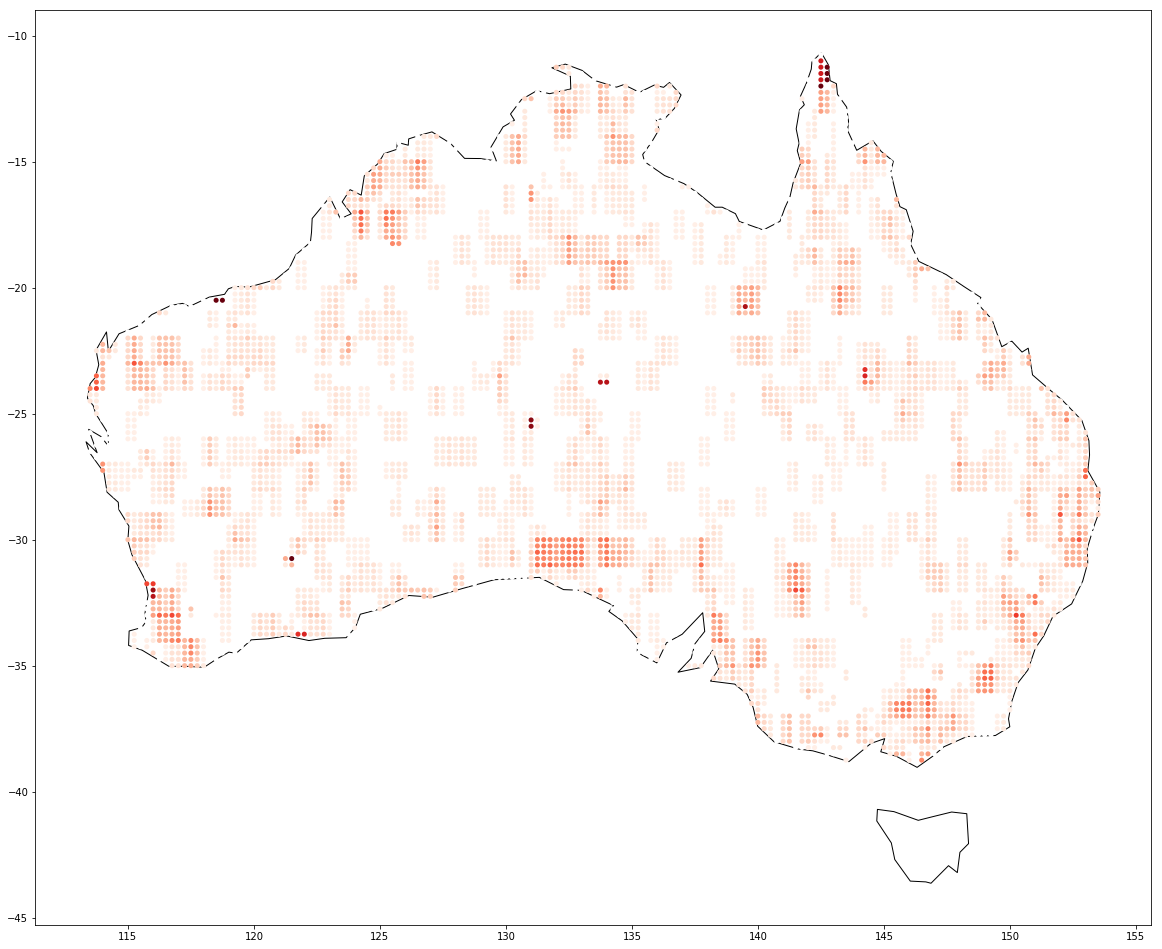

In [273]:
from matplotlib import pyplot as plt

cmap_fy_reds=plt.cm.get_cmap('Reds', 34)

xgdf = geopandas.GeoDataFrame(frdf, geometry='Coordinates')
ax = world2[world.name == 'Australia'].plot(
    color='white', edgecolor='black',figsize=(20,20))

# We can now plot our GeoDataFrame.
xgdf.plot(ax=ax, color='white')

for xx in range(34):
    if(xx>0):
        podf =  frdf.loc[frdf['Count'] == xx]
        xpodf = geopandas.GeoDataFrame(podf, geometry='Coordinates')
        xpodf.plot(ax=ax, color=cmap_reds(xx))

In [260]:
xrows_list = []
for i in range(len(xdf)):
    wkt_string=wkt.dumps(xdf.iloc[i]['Coordinates'])
    types = [ "DigitalGlobeAcquisition" ]
    cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2018-01-01T00:00:00.000Z",
                          endDate="2018-06-01T00:00:00.000Z",
                          types=types)

    dict1 = {'Coordinates': xdf.iloc[i]['Coordinates'], 'Count': len(cresults)}
    xrows_list.append(dict1)

dubrdf = pd.DataFrame(xrows_list)

In [261]:
 dubrdf.loc[dubrdf['Count'].idxmax()]

Coordinates    POLYGON ((153.1 -27.5, 153.0995184726672 -27.5...
Count                                                        120
Name: 637, dtype: object

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


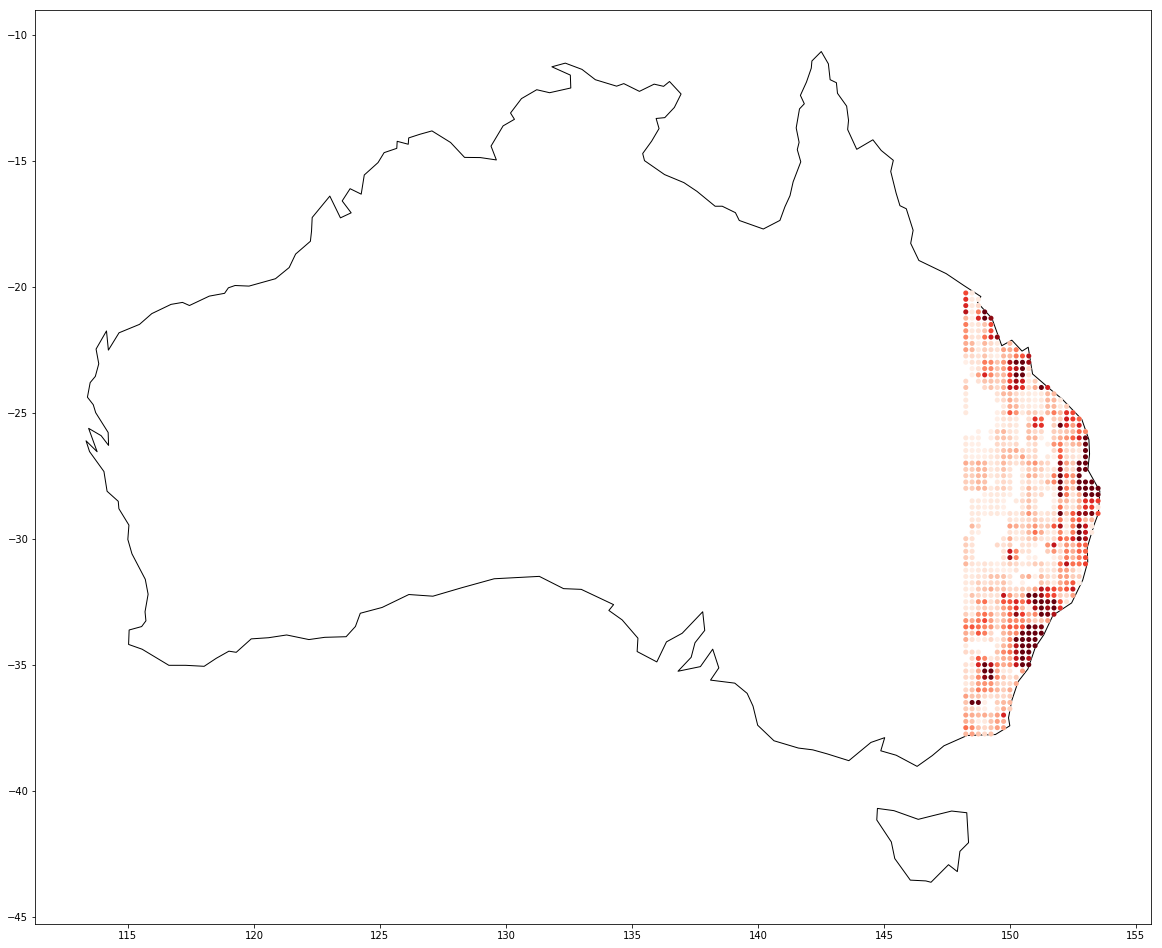

In [263]:
from matplotlib import pyplot as plt

xgdf = geopandas.GeoDataFrame(dubrdf, geometry='Coordinates')
ax = world2[world.name == 'Australia'].plot(
    color='white', edgecolor='black',figsize=(20,20))

xgdf.plot(ax=ax, color='white')

cmap_fy_reds=plt.cm.get_cmap('Reds', 120)

for xx in range(120):
    podf =  dubrdf.loc[dubrdf['Count'] == xx]
    xpodf = geopandas.GeoDataFrame(podf, geometry='Coordinates')
    cmapndx = 0.0
    if(xx>0):
        cmapndx=(xx/28)
        xpodf.plot(ax=ax, color=cmap_reds(cmapndx))